### Base

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/ensai/Downloads/dmoz.csv(1)/dmoz.csv")
df = df.iloc[: , 1:]

In [4]:
df.head()

,category,title,desc
0,Arts,About.com: Animation Guide,Keep up with developments in online animation ...
1,Arts,Toonhound,"British cartoon, animation and comic strip cre..."
2,Arts,Enculturation: From Mouse to Mouse: Overcoming...,Essay by Patricia Pisters on the animated imag...
3,Arts,Digital Media FX: The History of Animation,Michael Crandol takes an exhaustive look at th...
4,Arts,Spark Online: Only Genius Is Genius,Chris Romano feels that the proliferation of F...


In [3]:
len(df)

1195851

<Axes: >

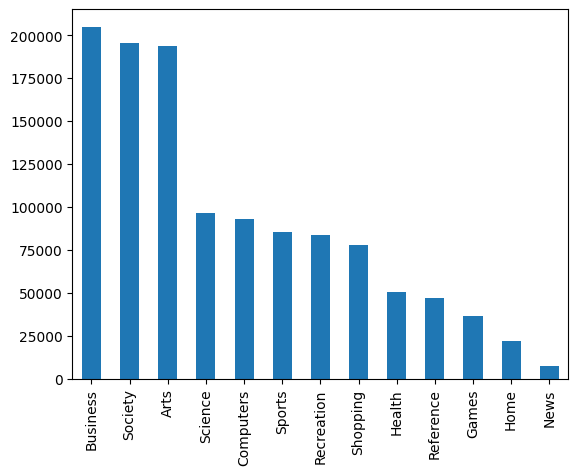

In [56]:
df.category.value_counts().plot(kind='bar')

### Custom

In [23]:
X = pd.DataFrame(df, columns=['desc'])
Y = pd.DataFrame(df, columns=['category'])

In [29]:
X = list(X["desc"])
Y = list(Y['category'])

In [7]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=10000)
X_custom = matrix.fit_transform(X)

In [32]:
print(X_custom)

  (0, 4994)	1
  (0, 9443)	1
  (0, 9879)	1
  (0, 2679)	1
  (0, 4585)	1
  (0, 6261)	2
  (0, 570)	1
  (0, 3734)	1
  (0, 465)	1
  (0, 8293)	1
  (0, 5223)	1
  (0, 2907)	1
  (0, 9154)	1
  (0, 554)	1
  (0, 8053)	1
  (0, 4698)	1
  (0, 3846)	1
  (0, 9906)	1
  (1, 570)	1
  (1, 554)	2
  (1, 3846)	1
  (1, 1325)	1
  (1, 1566)	1
  (1, 1996)	1
  (1, 8668)	1
  :	:
  (1195848, 7974)	1
  (1195848, 537)	1
  (1195849, 554)	1
  (1195849, 6064)	1
  (1195849, 8636)	1
  (1195849, 3524)	1
  (1195849, 4273)	1
  (1195850, 3734)	1
  (1195850, 554)	3
  (1195850, 6064)	1
  (1195850, 9016)	1
  (1195850, 3526)	1
  (1195850, 7957)	1
  (1195850, 4614)	1
  (1195850, 8744)	1
  (1195850, 4330)	1
  (1195850, 9192)	1
  (1195850, 123)	1
  (1195850, 3574)	1
  (1195850, 982)	1
  (1195850, 9938)	1
  (1195850, 974)	1
  (1195850, 3731)	1
  (1195850, 8350)	1
  (1195850, 8363)	1


In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_custom_tfidf = tfidf_transformer.fit_transform(X_custom)

In [35]:
print(X_custom_tfidf)

  (0, 9906)	0.19791145491647893
  (0, 9879)	0.11741113907272487
  (0, 9443)	0.21580399908443412
  (0, 9154)	0.21020474461041422
  (0, 8293)	0.3160486383875749
  (0, 8053)	0.34160409008597464
  (0, 6261)	0.32513488693890824
  (0, 5223)	0.255654156389392
  (0, 4994)	0.3016615769972173
  (0, 4698)	0.31911287873848576
  (0, 4585)	0.0857030114001968
  (0, 3846)	0.12675097548936434
  (0, 3734)	0.09357680157982406
  (0, 2907)	0.2345959107094177
  (0, 2679)	0.29486996493195927
  (0, 570)	0.2646740580418889
  (0, 554)	0.04486933195648995
  (0, 465)	0.17200906817386435
  (1, 9393)	0.2349757514660599
  (1, 9016)	0.09855717434791635
  (1, 8668)	0.3862179842911703
  (1, 7669)	0.21672891295723254
  (1, 6064)	0.16372782906495137
  (1, 5285)	0.17244465465393793
  (1, 3846)	0.15945324936764133
  :	:
  (1195848, 554)	0.08634483952981643
  (1195848, 537)	0.4037800895147343
  (1195849, 8636)	0.4470852737329842
  (1195849, 6064)	0.26981167760543867
  (1195849, 4273)	0.663399335285335
  (1195849, 3524)	0.52

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_custom_tfidf, Y, random_state=42, stratify=Y)

In [ ]:
#y = [data[i]['class'] for i in range(len(data))]

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import balanced_accuracy_score, f1_score
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

#Predict Class
y_pred_custom = classifier.predict(X_test)

#Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_custom)

In [48]:
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report

In [49]:
f1_score(y_test,y_pred_custom,average='weighted')

0.7224384217048585

In [50]:
accuracy

0.7254911142850453

In [51]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

        Arts       0.73      0.83      0.78     48479
    Business       0.73      0.79      0.76     51228
   Computers       0.75      0.73      0.74     23301
       Games       0.86      0.63      0.73      9113
      Health       0.79      0.68      0.73     12597
        Home       0.79      0.53      0.63      5560
        News       0.68      0.43      0.53      1872
  Recreation       0.72      0.65      0.68     20904
   Reference       0.60      0.44      0.51     11857
     Science       0.70      0.59      0.64     24192
    Shopping       0.70      0.64      0.67     19546
     Society       0.67      0.77      0.72     48970
      Sports       0.84      0.81      0.83     21344

    accuracy                           0.73    298963
   macro avg       0.74      0.66      0.69    298963
weighted avg       0.73      0.73      0.72    298963



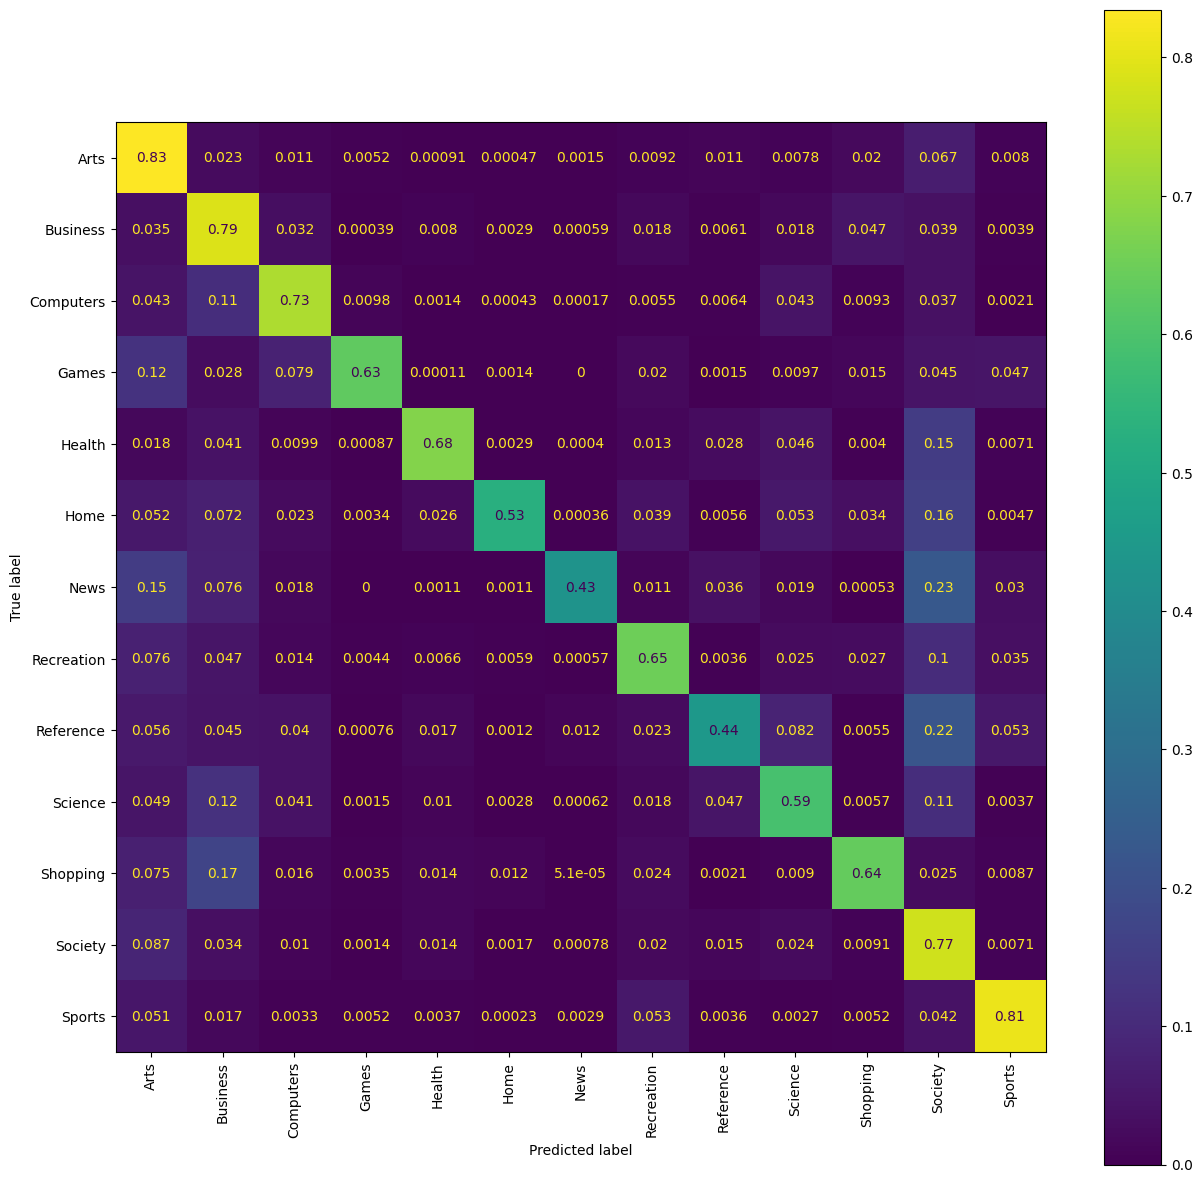

In [55]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_custom)

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_custom,xticks_rotation='vertical', normalize='true')

fig = cm_display.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(15)  

plt.show() 

# OTHER

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [67]:
pipe = Pipeline([('vect', CountVectorizer(max_features=50000)),
                         ('tfidf', TfidfTransformer()),
                         ('gnb', MultinomialNB())])
le = LabelEncoder()
le.fit(df.category)
y_data = le.transform(df.category)
X_data = df.desc.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1000)
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(max_features=50000)),
                ('tfidf', TfidfTransformer()), ('gnb', MultinomialNB())])

In [68]:
print(classification_report(pipe.predict(X_test), y_test, target_names=le.classes_))

              precision    recall  f1-score   support

        Arts       0.86      0.72      0.79     69409
    Business       0.83      0.73      0.78     70080
   Computers       0.74      0.77      0.76     26716
       Games       0.57      0.93      0.70      6647
      Health       0.64      0.83      0.72     11591
        Home       0.42      0.89      0.57      3150
        News       0.06      0.91      0.12       158
  Recreation       0.66      0.76      0.71     21901
   Reference       0.37      0.67      0.48      7916
     Science       0.62      0.73      0.67     24510
    Shopping       0.62      0.74      0.68     19484
     Society       0.81      0.66      0.73     72506
      Sports       0.82      0.85      0.84     24688

    accuracy                           0.74    358756
   macro avg       0.62      0.78      0.66    358756
weighted avg       0.76      0.74      0.74    358756



In [109]:
test_df = pd.read_csv("/home/ensai/imatag/website_categorization_custom/categorization/Datasets/URL Classification.csv", names=['0', 'url', 'category'])

In [107]:
import ast

def convert_to_list(row):
    return ast.literal_eval(row['tokens'])

In [89]:
test_df['tokens'] = test_df.apply(convert_to_list, axis = 1)

In [90]:
test_df['desc'] = [' '.join(row['tokens']) for index,row in test_df.iterrows()]

In [91]:
test_df.head()

,url,category,tokens,desc
0,http://houshosenshi.tripod.com/welcome.html,Arts,"[Enter, Dream, Follow, destiny, path, Come, In...",Enter Dream Follow destiny path Come Inside Cl...
1,http://www.jefflindsay.com/ldsfaq/fq_missouri....,Society,"[Mormon, Answers, Questions, Mormon, War, Miss...",Mormon Answers Questions Mormon War Missouri L...
2,http://www.stephenbcomedy.com/,Arts,"[full, functionality, site, necessary, enable,...",full functionality site necessary enable JavaS...
3,http://crested-butte-wild-mushroom-festival.com/,Recreation,"[Web, Source, Magic, Mushrooms, Wild, Mushroom...",Web Source Magic Mushrooms Wild Mushrooms Edib...
4,http://www.racetech.com/,Shopping,"[Race, Techsuspension, EnginesSearchesProduct,...",Race Techsuspension EnginesSearchesProduct Sea...


<Axes: >

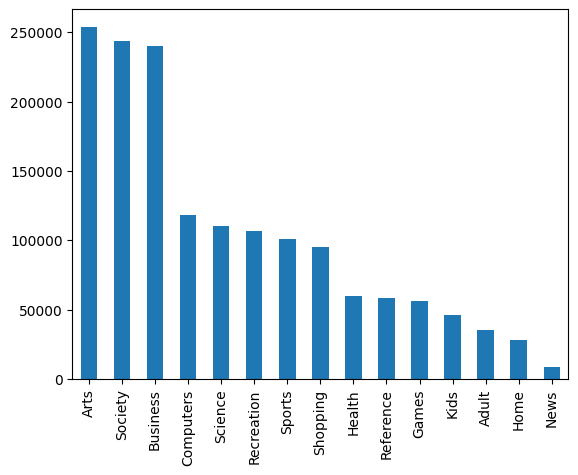

In [110]:
test_df.category.value_counts().plot(kind='bar')

In [111]:
test_df = test_df[test_df['category'] != 'Adult']
test_df = test_df[test_df['category'] != 'Kids']

In [112]:
len(test_df)

1481471

In [103]:
y_data = le.transform(test_df.category)
X_data = test_df.desc.values

In [104]:
print(classification_report(pipe.predict(X_data), y_data, target_names=le.classes_))

              precision    recall  f1-score   support

        Arts       0.43      0.69      0.53        55
    Business       0.47      0.73      0.57        51
   Computers       0.80      0.24      0.37       168
       Games       0.57      0.75      0.65        16
      Health       0.73      0.85      0.79        13
        Home       0.20      0.40      0.27         5
        News       0.00      0.00      0.00         2
  Recreation       0.43      0.56      0.49        36
   Reference       0.53      0.69      0.60        13
     Science       0.27      0.58      0.37        12
    Shopping       0.41      0.68      0.51        19
     Society       0.57      0.51      0.54       100
      Sports       0.42      0.83      0.56        12

    accuracy                           0.50       502
   macro avg       0.45      0.58      0.48       502
weighted avg       0.59      0.50      0.48       502

